# Project: Yelp Rating Predictor

## Load Yelp data

To get a better understanding, it was loaded all the datasets into a separated Pandas dataframes:

- yelp_business.json: establishment data regarding location and attributes for all businesses in the dataset
- yelp_review.json: Yelp review metadata by business
- yelp_user.json: user profile metadata by business
- yelp_checkin.json: online checkin metadata by business
- yelp_tip.json: tip metadata by business
- yelp_photo.json: photo metadata by business

Some business questions arose during this section, where it was used some useful Pandas functions to answer that.

### Business dataframe

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import json


df_business = pd.read_json("data/yelp_business.json", lines=True)
#json_structure = json.loads(df_business.to_json(orient="records"))
#df_business = pd.json_normalize(json_structure)

df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

How many different businesses are in the business dataset?

In [57]:
nr_business = df_business.shape[0]
print("There are " + str(nr_business) + " different businesses.")

There are 188593 different businesses.


What is the Yelp rating, or stars, of the establishment with business_id = "5EvUIR4IzCWUOm0PsUZXjA"?

In [58]:
df_business.query("business_id == '5EvUIR4IzCWUOm0PsUZXjA'")["stars"]

30781    3.0
Name: stars, dtype: float64

### Review dataframe

In [59]:
df_review = pd.read_json("data/yelp_review.json", lines=True, orient="columns")

df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   business_id               188593 non-null  object 
 1   average_review_age        188593 non-null  float64
 2   average_review_length     188593 non-null  float64
 3   average_review_sentiment  188593 non-null  float64
 4   number_funny_votes        188593 non-null  int64  
 5   number_cool_votes         188593 non-null  int64  
 6   number_useful_votes       188593 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 10.1+ MB


What are the different features in the review dataset?

In [60]:
nr_features = df_review.shape[1]
feature_names = df_review.columns

print("There are " + str(nr_features) + " different features.")
print("The features names are: ", * feature_names, sep="\n")

There are 7 different features.
The features names are: 
business_id
average_review_age
average_review_length
average_review_sentiment
number_funny_votes
number_cool_votes
number_useful_votes


### User Dataframe

In [61]:
df_user = pd.read_json("data/yelp_user.json", lines=True, orient="columns")

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 188593 non-null  object 
 1   average_number_friends      188593 non-null  float64
 2   average_days_on_yelp        188593 non-null  float64
 3   average_number_fans         188593 non-null  float64
 4   average_review_count        188593 non-null  float64
 5   average_number_years_elite  188593 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.6+ MB


What is the range of values for the features in the user dataset?

In [62]:
df_user.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


### Checking Dataframe

In [63]:
df_checkin = pd.read_json("data/yelp_checkin.json", lines=True, orient="columns")
#json_structure = json.loads(df_checkin.to_json(orient="records"))
#df_checkin = pd.json_normalize(json_structure)

df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


### Tip Dataframe

In [64]:
df_tip = pd.read_json("data/yelp_tip.json", lines=True, orient="columns")

df_tip.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB


### Photo Dataframe

In [65]:
df_photo = pd.read_json("data/yelp_photo.json", lines=True, orient="columns")

df_photo.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32976 entries, 0 to 32975
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             32976 non-null  object 
 1   average_caption_length  32976 non-null  float64
 2   number_pics             32976 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 773.0+ KB


## Merging the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the **business_id**.

In [66]:
from functools import reduce

all_dfs = [df_business, df_tip, df_photo, df_user, df_review, df_checkin]

df = reduce(lambda left, right: pd.merge(left, right, on="business_id"), all_dfs)

print("The columns are: ", *df.columns, sep="\n")

The columns are: 
address
alcohol?
attributes
business_id
categories
city
good_for_kids
has_bike_parking
has_wifi
hours
is_open
latitude
longitude
name
neighborhood
postal_code
price_range
review_count
stars
state
take_reservations
takes_credit_cards
average_tip_length
number_tips
average_caption_length
number_pics
average_number_friends
average_days_on_yelp
average_number_fans
average_review_count
average_number_years_elite
average_review_age
average_review_length
average_review_sentiment
number_funny_votes
number_cool_votes
number_useful_votes
time
weekday_checkins
weekend_checkins


## Cleaning/Preprocessing Data

Now that all of the data has been imported as a pandas DataFrame, we just have to clean our data a bit so we can focus on the features that might have predictive power for
determining an establishment’s Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an effect on our dependent variable, the Yelp rating.
For this project, we will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not
continuous or binary and that we do not want to make predictions on.

Now we just have to check our data to make sure we don’t have any missing values, or NaNs, which will prevent the Linear Regression model from running correctly. Check if df is
missing any values. Fill any missing values in df with 0, and then confirm the missing values have been filled.

### Dropping unnecessary features

In [67]:
features_to_remove = ['address', 'attributes', 'business_id', 'categories',
                    'city', 'hours', 'is_open', 'latitude', 'longitude',
                    'name', 'neighborhood', 'postal_code', 'state', 'time']

df = df.drop(columns=features_to_remove, axis=1)

### Filling NaN values

In [68]:

df = df.fillna(0)

df.isnull().sum()

alcohol?                      0
good_for_kids                 0
has_bike_parking              0
has_wifi                      0
price_range                   0
review_count                  0
stars                         0
take_reservations             0
takes_credit_cards            0
average_tip_length            0
number_tips                   0
average_caption_length        0
number_pics                   0
average_number_friends        0
average_days_on_yelp          0
average_number_fans           0
average_review_count          0
average_number_years_elite    0
average_review_age            0
average_review_length         0
average_review_sentiment      0
number_funny_votes            0
number_cool_votes             0
number_useful_votes           0
weekday_checkins              0
weekend_checkins              0
dtype: int64

## Looking for Correlations

Now that our data is all together, let’s investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called stars in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model.

In [69]:
corr_matrix = df.corr()
corr_matrix["stars"].sort_values(ascending=False)

stars                         1.000000
average_review_sentiment      0.812657
number_cool_votes             0.150486
review_count                  0.133085
number_tips                   0.113101
has_bike_parking              0.110820
number_useful_votes           0.094877
weekday_checkins              0.085726
weekend_checkins              0.082455
average_caption_length        0.081561
take_reservations             0.068549
price_range                   0.065944
number_pics                   0.060608
alcohol?                      0.050019
number_funny_votes            0.048075
has_wifi                      0.046172
average_number_friends        0.010631
average_number_fans          -0.002684
average_days_on_yelp         -0.011864
average_number_years_elite   -0.021378
average_tip_length           -0.039051
average_review_count         -0.059067
good_for_kids                -0.065822
takes_credit_cards           -0.073570
average_review_length        -0.109172
average_review_age       

array([[<AxesSubplot:xlabel='stars', ylabel='stars'>,
        <AxesSubplot:xlabel='average_review_sentiment', ylabel='stars'>,
        <AxesSubplot:xlabel='average_review_length', ylabel='stars'>,
        <AxesSubplot:xlabel='average_review_age', ylabel='stars'>],
       [<AxesSubplot:xlabel='stars', ylabel='average_review_sentiment'>,
        <AxesSubplot:xlabel='average_review_sentiment', ylabel='average_review_sentiment'>,
        <AxesSubplot:xlabel='average_review_length', ylabel='average_review_sentiment'>,
        <AxesSubplot:xlabel='average_review_age', ylabel='average_review_sentiment'>],
       [<AxesSubplot:xlabel='stars', ylabel='average_review_length'>,
        <AxesSubplot:xlabel='average_review_sentiment', ylabel='average_review_length'>,
        <AxesSubplot:xlabel='average_review_length', ylabel='average_review_length'>,
        <AxesSubplot:xlabel='average_review_age', ylabel='average_review_length'>],
       [<AxesSubplot:xlabel='stars', ylabel='average_review_age'>

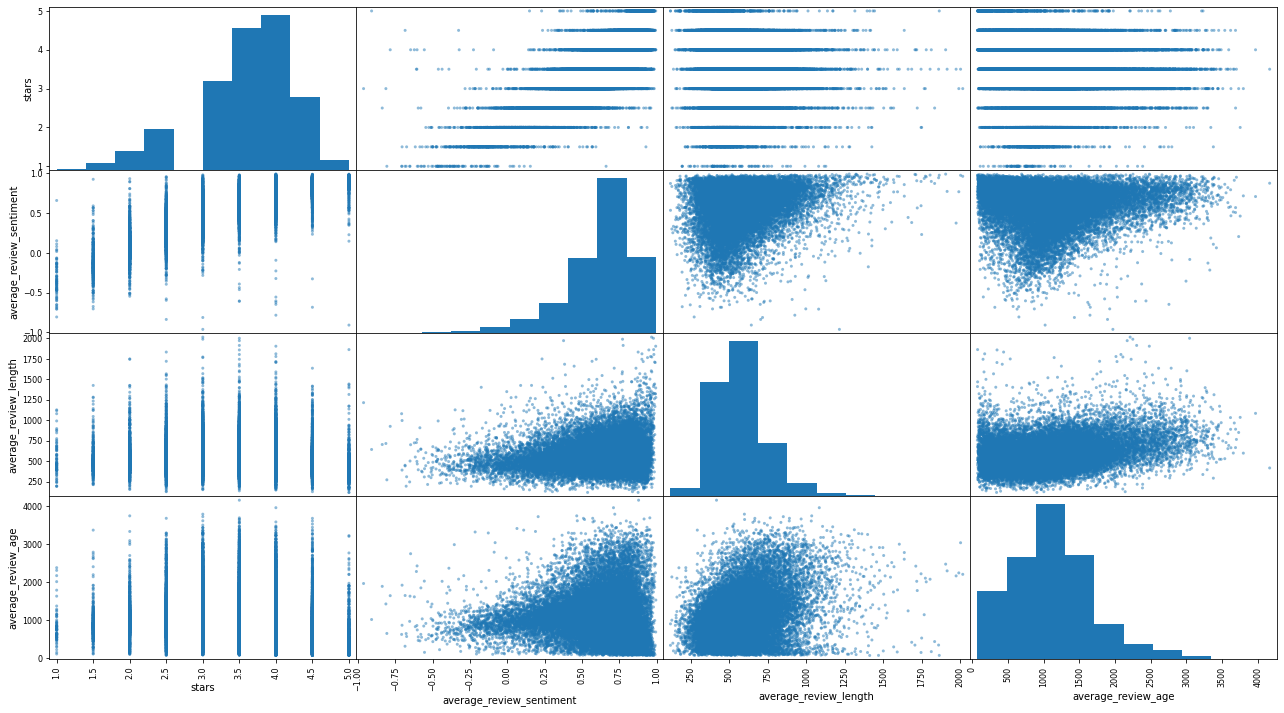

In [70]:
import pandas.plotting as plt

more_corr_attr = ["stars", "average_review_sentiment", "average_review_length", "average_review_age"]

plt.scatter_matrix(df[more_corr_attr], figsize=(22, 12))

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are average_review_sentiment, average_review_length, and average_review_age.

In [71]:
attributes = ["average_review_sentiment", "average_review_length", "average_review_age"]

rating = df["stars"]
features = df[attributes]

### Split Data into Training and Testing Sets

In [72]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, rating_train, rating_test =  train_test_split(features, rating, test_size=0.2, random_state=1)

### Create and Train the Model

In [73]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(feature_train, rating_train)

print("Coefficients: ", *regression.coef_, sep="\n")

Coefficients: 
2.559830247629792
-0.0008644983594984537
-9.676544912523277e-05


### Evaluate and Understand the Model

In [74]:
regression.score(feature_train, rating_train)

0.7201700664869468

In [75]:
regression.score(feature_test, rating_test)

0.7108750438179052

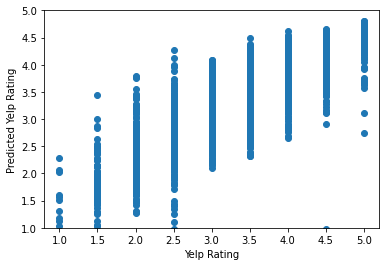

In [76]:
import matplotlib.pyplot as plot

rating_predicted = regression.predict(feature_test)

plot.scatter(rating_test, rating_predicted)
plot.xlabel('Yelp Rating')
plot.ylabel('Predicted Yelp Rating')
plot.ylim(1,5)
plot.show()

### Model Prediction

In [81]:
import numpy as np

danielles_delicious_delicacies = np.array([0,1,1]).reshape(1,-1)

regression.predict(danielles_delicious_delicacies)

/Users/patricia-oliveira/env/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.57898271])